In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL.ImageColor import colormap

In [3]:
df = pd.read_csv('hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
print(df.shape)

(5000, 3)


In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<module 'matplotlib.pyplot' from '/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

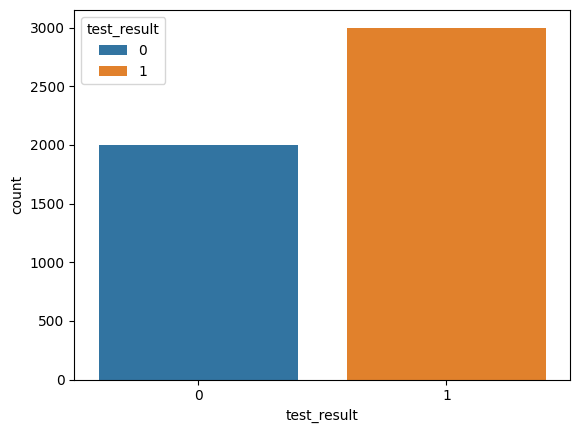

In [7]:
# 2000 people have failed the exam and 3000 have passed
sns.countplot(x=df['test_result'], hue=df['test_result'])
plt

<Axes: xlabel='test_result', ylabel='age'>

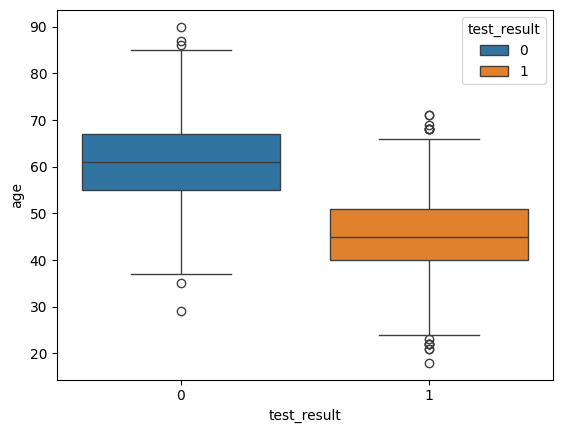

In [8]:
# is there a relation between test_result and age?
sns.boxplot(x='test_result', y='age', data=df, hue='test_result')

<Axes: xlabel='test_result', ylabel='physical_score'>

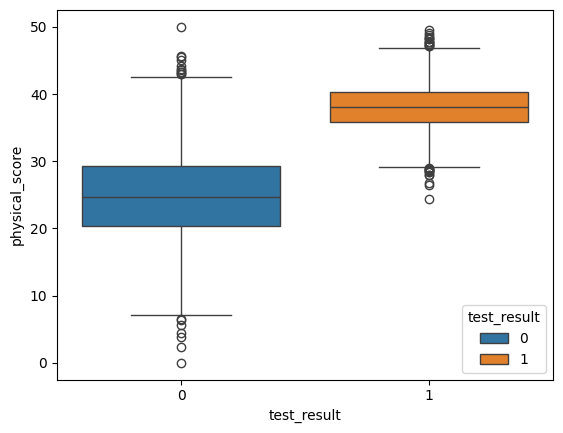

In [9]:
# is there a relation between test_result and physical_score?
sns.boxplot(x='test_result', y='physical_score', data=df, hue='test_result')

<Axes: xlabel='age', ylabel='physical_score'>

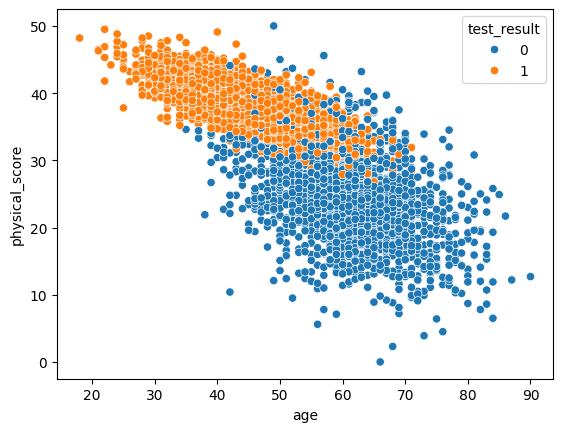

In [10]:
# relation between age and physical_score
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result')

<Axes: >

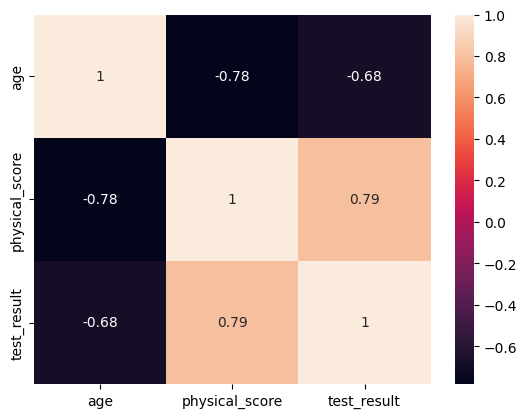

In [11]:
# plotting heatmap based on correlations
sns.heatmap(df.corr(), annot=True)

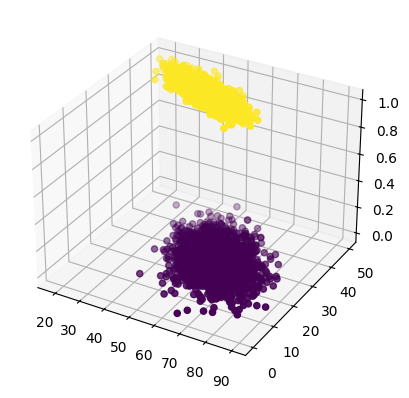

In [12]:
# 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])

In [13]:
# splitting X and y
X = df.drop('test_result', axis=1)
y = df['test_result']

In [14]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [15]:
# Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [17]:
y_pred = log_model.predict(scaled_X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [18]:
y_pred2 = log_model.predict_proba(scaled_X_test)
y_pred2
# here it says e.g. in index 0(first instance), the probability of 1 is 97% and the probability of 0 is 2%
# e.g. in index 2(third instance), the probability of 1 is 1% and the probability of 0 is 98% and so on...

array([[2.38051656e-02, 9.76194834e-01],
       [2.68854070e-02, 9.73114593e-01],
       [9.89220033e-01, 1.07799673e-02],
       [1.90238747e-03, 9.98097613e-01],
       [9.75065740e-01, 2.49342602e-02],
       [9.89676918e-01, 1.03230822e-02],
       [7.39558885e-02, 9.26044112e-01],
       [1.70641117e-02, 9.82935888e-01],
       [9.97075399e-01, 2.92460122e-03],
       [3.30092529e-02, 9.66990747e-01],
       [8.30393770e-02, 9.16960623e-01],
       [9.90796129e-03, 9.90092039e-01],
       [7.07374696e-03, 9.92926253e-01],
       [9.34320413e-01, 6.56795867e-02],
       [1.16096233e-04, 9.99883904e-01],
       [6.58212248e-02, 9.34178775e-01],
       [9.89155494e-01, 1.08445064e-02],
       [2.79291486e-03, 9.97207085e-01],
       [5.57001286e-04, 9.99442999e-01],
       [9.96534179e-01, 3.46582117e-03],
       [8.81902000e-01, 1.18098000e-01],
       [1.30963044e-01, 8.69036956e-01],
       [5.45789772e-01, 4.54210228e-01],
       [3.43636758e-02, 9.65636324e-01],
       [3.984685

In [65]:
# we can set a threshold and say if it's more than 0.7 then set it as 1
print(y_pred2[7])
print(y_pred[7])

[0.01706411 0.98293589]
1


In [19]:
log_model.coef_
# these coefs say that the relation between age(first column) and test_result is negative(reverse)(the more the age the highlier they fail)
# and the relation between physical_score and test_result is positive(the better the physical the highlier they pass)

array([[-0.95017725,  3.46148946]])

# in linear regression we used distance between instances(real and pred) to find out the error, if it was min it was ideal
# in logistic we can't do that since we only have 1 and 0
# we must know how many label it has predicted right and how many wrong...
# there are many metrics for this and the popular oned are:
# 1. Acuracy
# 2. Precision
# 3. Recall
# 4. F1_score


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(accuracy) # it says 93% of result is correct

0.93


In [21]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[172,  21],
       [ 14, 293]])

In [22]:
(172+293) / len(y_test)

0.93

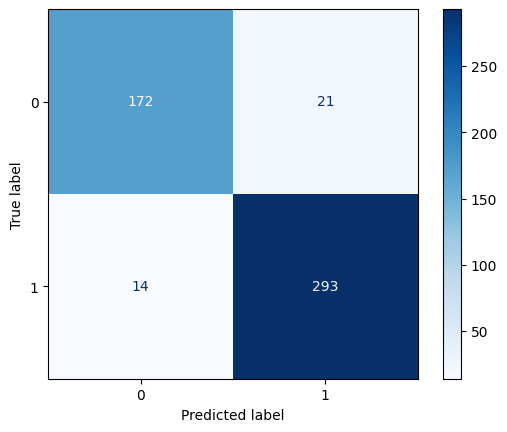

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test, cmap='Blues')
plt.show()

In [24]:
# if accuracy and precision and recall values are almost the same, that means our model is doing good
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [25]:
# if accuracy and precision and recall values are almost the same, that means our model is doing good

from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
print(precision, recall, f1_score)

0.9331210191082803 0.9543973941368078 0.9436392914653784


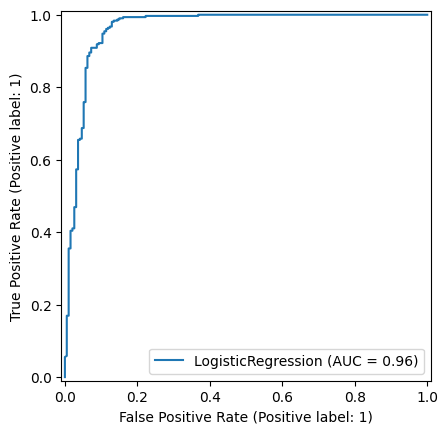

In [26]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test)
plt.show()
# our ideal in this plot is a 90degree line
# the more its curve sticks to 1 the better our model would be and the more it looks like a straight line the worse our model is

In [45]:
 # log_model.predict_proba(scaled_X_test)[:, 1]
 # log_model.predict_proba(scaled_X_test)[1]
a =  log_model.predict_proba(scaled_X_test)
print(a)
print(a.ndim, a.shape)

[[2.38051656e-02 9.76194834e-01]
 [2.68854070e-02 9.73114593e-01]
 [9.89220033e-01 1.07799673e-02]
 [1.90238747e-03 9.98097613e-01]
 [9.75065740e-01 2.49342602e-02]
 [9.89676918e-01 1.03230822e-02]
 [7.39558885e-02 9.26044112e-01]
 [1.70641117e-02 9.82935888e-01]
 [9.97075399e-01 2.92460122e-03]
 [3.30092529e-02 9.66990747e-01]
 [8.30393770e-02 9.16960623e-01]
 [9.90796129e-03 9.90092039e-01]
 [7.07374696e-03 9.92926253e-01]
 [9.34320413e-01 6.56795867e-02]
 [1.16096233e-04 9.99883904e-01]
 [6.58212248e-02 9.34178775e-01]
 [9.89155494e-01 1.08445064e-02]
 [2.79291486e-03 9.97207085e-01]
 [5.57001286e-04 9.99442999e-01]
 [9.96534179e-01 3.46582117e-03]
 [8.81902000e-01 1.18098000e-01]
 [1.30963044e-01 8.69036956e-01]
 [5.45789772e-01 4.54210228e-01]
 [3.43636758e-02 9.65636324e-01]
 [3.98468565e-01 6.01531435e-01]
 [5.35562586e-01 4.64437414e-01]
 [3.89490318e-02 9.61050968e-01]
 [1.92648917e-02 9.80735108e-01]
 [9.13066559e-01 8.69334412e-02]
 [2.95639119e-04 9.99704361e-01]
 [4.581258

In [47]:
print(a[1:3])
print(a[1:3, 0])
# print(a[:, 1])


[[0.02688541 0.97311459]
 [0.98922003 0.01077997]]
[0.02688541 0.98922003]


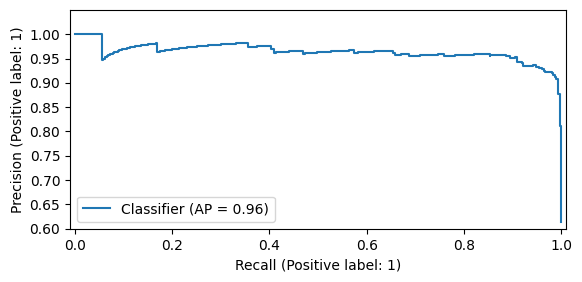

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
y_scores = log_model.predict_proba(scaled_X_test)[:, 1]  # احتمال کلاس 1
PrecisionRecallDisplay.from_predictions(y_test, y_scores)
plt.ylim(0.7, 1.05)
plt.yticks(np.arange(0.6, 1.05, 0.05))
plt.show()
# as precision increases recall decreases (kinda...)